## Modulo designado para la creación de el modelo usando XGBOOST
En este punto los datasets ya se encuentran en archivos .csv dentro de la carpeta
"CSV ready to model"


In [5]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier #esta parcera toca instalarla pip install xgboost
from sklearn.preprocessing import LabelEncoder
import qgrid
from sklearn.model_selection import train_test_split
import scikitplot as skplt#Esta librería toca instalarla "conda install -c conda-forge scikit-plot"
import time
import sys
sys.path.append('..')
from funciones import classification_error, grafica_roc,sumar

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve
df=pd.read_csv('../../CSV ready to model/withoutPCA.csv')

In [7]:
print(grafica_roc)

<function grafica_roc at 0x7fc348570830>


Label encoder para la columna a predecir

In [8]:
le=LabelEncoder()
df['GRAVEDAD']=df.loc[:,['GRAVEDAD']].apply(le.fit_transform)
y=df['GRAVEDAD']
x=df.drop(['GRAVEDAD','PERIODO'],axis=1)

In [49]:
def model_XG(x,y,estimadores, caracteristicas, impresion = False,normalize=False):
    
    tiempo_i = time.time()
    accuracy_list = np.zeros([4])
    precision_list = np.zeros([4,3])
    recall_list = np.zeros([4,3])
    f_list = np.zeros([4,3])
    errores = np.zeros(4)
  
    XG = XGBClassifier(n_estimators=estimadores, max_features =caracteristicas, n_jobs = -1)
    for j in range(4):
        Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.25) # Modificar metodología de validación

        XG.fit(Xtrain, Ytrain)
        pred = XG.predict(Xtest)

        #code for calculating accuracy
        _accuracy_ = accuracy_score(Ytest, pred, normalize=True)
        accuracy_list[j] = _accuracy_

        #code for calculating recall
        _recalls_ = recall_score(Ytest, pred, average=None)
        recall_list[j] = _recalls_

        #code for calculating precision
        _precisions_ = precision_score(Ytest, pred, average=None)
        precision_list[j] = _precisions_

        _f_score_ = f1_score(Ytest, pred, average=None)
        f_list[j] = _f_score_


        errores[j] = classification_error(pred, Ytest)

    if impresion == True:
        skplt.metrics.plot_confusion_matrix(Ytest, pred)
        grafica_roc(model=XG,Xtest=Xtest,Ytest=Ytest)

    result={'Eficiencia':np.mean(accuracy_list),'Int_Eficiencia':np.std(accuracy_list),
            'Sensibilidad':np.mean(recall_list),'Int_Sensibilidad':np.std(recall_list),
            'Precisión':np.mean(precision_list),'Int Precisión':np.std(precision_list),
            'F':np.mean(f_list),'Int_F':np.std(f_list),
            'Error':np.mean(errores),'Int_Error':np.std(errores),
            'Tiempo':time.time()-tiempo_i
            }
    return  result


53534     0
47459     0
113569    0
66469     2
29825     2
         ..
67530     0
35622     2
109188    0
60537     2
39743     2
Name: GRAVEDAD, Length: 28415, dtype: int64


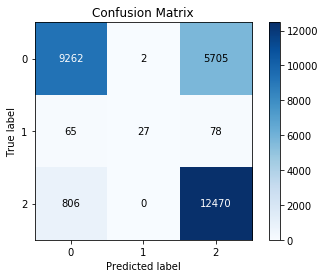

In [50]:
result = model_XG(x=x,y=y,estimadores=1,caracteristicas= 9, impresion = True,normalize=False)

In [44]:
print(result)

{'Eficiencia': 0.767649128981172, 'Int_Eficiencia': 0.00162980013673762, 'Sensibilidad': 0.5836725719081709, 'Int_Sensibilidad': 0.32099555018208076, 'Precisión': 0.8524393557133233, 'Int Precisión': 0.1272511812676317, 'F': 0.6119278490824656, 'Int_F': 0.22005734468873897, 'Error': 0.2323508710188281, 'Int_Error': 0.0016298001367376267, 'Tiempo': 1.2288610935211182}


In [ ]:
pd.options.mode.chained_assignment = None
randn = np.random.randn
df_types = pd.DataFrame({
    'Numero de arboles' : pd.Series([5,5,5,5,5,
                                     10,10,10,10,10,
                                     20,20,20,20,20,
                                     50,50,50,50,50,
                                     100,100,100,100,100]),
    'Variables analizadas por nodo' : pd.Series([5,6,7,8,9,
                                                 5,6,7,8,9,
                                                 5,6,7,8,9,
                                                 5,6,7,8,9,
                                                 5,6,7,8,9])})
df_types["Eficiencia"] = ""
df_types["Int_Eficiencia"] = ""
df_types["Sensibilidad"] = ""
df_types["Int_Sensibilidad"] = ""
df_types["Precision"] = ""
df_types["Int_Precision"] = ""
df_types["F-Score"] = ""
df_types["Int_F-Score"] = ""

df_types["Error_Prueba"] = ""
df_types["Int_error"] = ""
df_types["Tiempo de ejecución"] = ""
df_types.set_index(['Numero de arboles','Variables analizadas por nodo'], inplace=True)

for n, k in df_types.index:
    result = model_XG(x,y,n, k, impresion = False)
    df_types["Eficiencia"][n,k] = result['Eficiencia']
    df_types["Int_Eficiencia"][n,k] = result['Int_Eficiencia']
    df_types["Sensibilidad"][n,k] = result['Sensibilidad']
    df_types["Int_Sensibilidad"][n,k] = result['Int_Sensibilidad']
    df_types["Precision"][n,k] = result['Precisión']
    df_types["Int_Precision"][n,k] = result['Precisión']
    df_types["F-Score"][n,k] = result['F']
    df_types["Int_F-Score"][n,k] = result['Int_F']
    df_types["Error_Prueba"][n,k] = result['Error']
    df_types["Int_error"][n,k] = result['Int_Error']
    df_types["Tiempo de ejecución"][n,k] = result['Tiempo']


#df_types.sort_index(inplace=True)



In [ ]:
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget